### Угадываем признак

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv( 'athletes.csv' )
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.6+ KB


#### Попробуем угадать пол на основе роста, веса и вида спорта

Посмотрим много ли в наших признаках пустых значений

In [4]:
data[ pd.isnull( data['height'] ) ].head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
12,258556239,Abbas Qali,IOA,male,10/11/92,NaN,NaN,aquatics,0,0,0
47,469953606,Abdoullah Bamoussa,ITA,male,6/8/86,NaN,NaN,athletics,0,0,0
50,325809293,Abdul Omar,GHA,male,10/3/93,NaN,NaN,boxing,0,0,0
52,262868423,Abdulaziz Alshatti,IOA,male,10/30/90,NaN,NaN,fencing,0,0,0
56,897549624,Abdullah Hel Baki,BAN,male,8/1/89,NaN,NaN,shooting,0,0,0


In [5]:
print 'Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) )
print 'Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) )
print 'Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) )
print 'Всего строк в наборе ' + str( len( data ) )

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [6]:
data['height'].unique()

array([ 1.72,  1.68,  1.98,  1.83,  1.81,  1.8 ,  2.05,  1.93,  1.65,
        1.7 ,  1.75,   nan,  1.61,  1.78,  1.76,  2.1 ,  1.73,  1.85,
        1.77,  1.9 ,  1.86,  1.74,  1.6 ,  2.07,  1.88,  1.66,  1.62,
        1.87,  2.03,  1.69,  1.82,  1.89,  1.94,  1.95,  1.71,  1.84,
        1.91,  1.67,  2.02,  1.58,  1.63,  1.79,  1.97,  1.56,  1.55,
        1.57,  1.46,  1.92,  1.64,  1.53,  1.99,  1.96,  2.  ,  2.04,
        1.47,  1.52,  2.01,  1.51,  1.59,  2.08,  1.37,  1.5 ,  1.45,
        2.06,  1.54,  2.11,  1.43,  1.49,  1.33,  1.48,  1.44,  2.13,
        2.09,  2.21,  2.18,  1.21,  1.38,  1.34,  2.15,  2.17,  1.42,
        1.4 ,  2.14])

In [7]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 0 to 11537
Data columns (total 11 columns):
id             10858 non-null int64
name           10858 non-null object
nationality    10858 non-null object
sex            10858 non-null object
dob            10858 non-null object
height         10858 non-null float64
weight         10858 non-null float64
sport          10858 non-null object
gold           10858 non-null int64
silver         10858 non-null int64
bronze         10858 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 1017.9+ KB


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
# попробуем выбрать какие-нибудь признаки
selectedColumns = data[ [ 'height', 'weight', 'sport', 'sex' ] ]
X = pd.get_dummies( selectedColumns, columns = [ 'sport' ] )

del X['sex']
X.head()

,height,weight,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,...,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
0,1.72,64.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.68,56.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.98,79.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.83,80.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1.81,71.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
le.fit( data['sex'] )

LabelEncoder()

In [13]:
le.classes_

array(['female', 'male'], dtype=object)

In [14]:
le.transform( [ 'male', 'female', 'male' ] )

array([1, 0, 1], dtype=int64)

In [15]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0 )

In [17]:
model = LogisticRegression()

In [18]:
model.fit( X_train, y_train )
predictions = model.predict_proba( X_test )

In [19]:
predictions[:5]

array([[ 0.10689171,  0.89310829],
       [ 0.65065669,  0.34934331],
       [ 0.30871152,  0.69128848],
       [ 0.00774828,  0.99225172],
       [ 0.36646421,  0.63353579]])

In [20]:
zip( predictions[:, 1], y_test )

[(0.89310829028335492, 1),
 (0.34934330641266231, 0),
 (0.69128848440293511, 1),
 (0.99225172156740771, 1),
 (0.63353579017987571, 1),
 (0.95539321574893743, 1),
 (0.64778362493710206, 1),
 (0.82564619617016233, 1),
 (0.080617802128127344, 0),
 (0.87857814910401222, 1),
 (0.89967722542141904, 1),
 (0.56145893553060788, 0),
 (0.99804335661047527, 1),
 (0.96812572510910999, 1),
 (0.78847908406364897, 1),
 (0.95234277017726576, 1),
 (0.37393682261399142, 0),
 (0.93573271457693963, 0),
 (0.99978982145902451, 1),
 (0.34221685529741086, 1),
 (0.86413366003658076, 1),
 (0.30350422446482012, 0),
 (0.89140312359097029, 0),
 (0.12984760342948948, 0),
 (0.60045227678650681, 1),
 (0.35851400444290921, 0),
 (0.63103725029428515, 1),
 (0.84652079480188047, 1),
 (0.079228168018306039, 0),
 (0.58697158381323167, 0),
 (0.970739784708883, 1),
 (0.89897329869194142, 1),
 (0.68994670424552862, 1),
 (0.20738001786963201, 1),
 (0.56973223143460849, 0),
 (0.57038147814046536, 0),
 (0.89930008040299203, 1),
 

In [21]:
from sklearn.metrics import roc_curve, precision_recall_curve

In [23]:
pr, re, thres = precision_recall_curve(y_test, predictions[:, 1])

In [24]:
len( thres )

2774

In [25]:
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


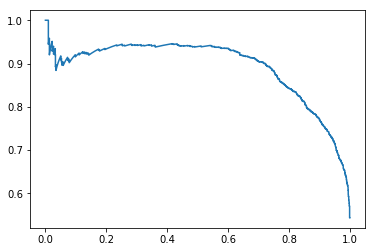

In [26]:
pl.plot( re, pr )

In [27]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

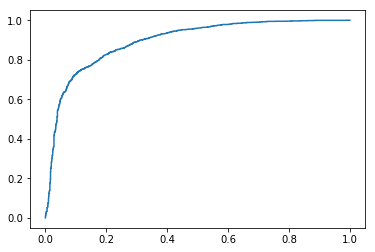

In [28]:
pl.plot( fpr, tpr )